In [4]:
import seaborn as sns
from decouple import config
import pandas as pd
import matplotlib.pyplot as plt
import nilearn.image as img

In [19]:
task ='eft'
participant = 'B2083'

In [20]:
path = config(task)
if 'G' in participant:
    preprocessed_path = 'preprocessed_t1'
else:
    preprocessed_path = 'preprocessed_t2'

confounds_df = pd.read_csv(f'{path}/{preprocessed_path}/sub-{participant}/func/sub-{participant}_task-{task}_desc-confounds_timeseries.tsv', sep='\t').fillna(0)

if 'G' in participant:
    bids_path = config('bids_t1')
else:
    bids_path = config('bids_t2')

events_df = pd.read_csv(f'{bids_path}/sub-{participant}/func/sub-{participant}_task-{task}_events.tsv')

In [21]:
regressors = confounds_df.filter(regex=("a_comp_cor.*")).to_dict(orient='series')
regressors.update([
        ('trans_x', confounds_df['trans_x']),
        ('trans_y', confounds_df['trans_y']),
        ('trans_z', confounds_df['trans_z']),
        ('rot_x', confounds_df['rot_x']),
        ('rot_y', confounds_df['rot_y']),
        ('rot_z', confounds_df['rot_z']),                   
        ('trans_x_derivative1', confounds_df['trans_x_derivative1']),
        ('trans_y_derivative1', confounds_df['trans_y_derivative1']),
        ('trans_z_derivative1', confounds_df['trans_z_derivative1']),
        ('rot_x_derivative1', confounds_df['rot_x_derivative1']),
        ('rot_y_derivative1', confounds_df['rot_y_derivative1']),
        ('rot_z_derivative1', confounds_df['rot_z_derivative1']), 
        ('trans_x_power2', confounds_df['trans_x_power2']),
        ('trans_y_power2', confounds_df['trans_y_power2']),
        ('trans_z_power2', confounds_df['trans_z_power2']),
        ('rot_x_power2', confounds_df['rot_x_power2']),
        ('rot_y_power2', confounds_df['rot_y_power2']),
        ('rot_z_power2', confounds_df['rot_z_power2']), 
        ('trans_x_derivative1_power2', confounds_df['trans_x_derivative1_power2']),
        ('trans_y_derivative1_power2', confounds_df['trans_y_derivative1_power2']),
        ('trans_z_derivative1_power2', confounds_df['trans_z_derivative1_power2']),
        ('rot_x_derivative1_power2', confounds_df['rot_x_derivative1_power2']),
        ('rot_y_derivative1_power2', confounds_df['rot_y_derivative1_power2']),
        ('rot_z_derivative1_power2', confounds_df['rot_z_derivative1_power2']),
        ])
regressors_df = pd.DataFrame(data=regressors)

<AxesSubplot: >

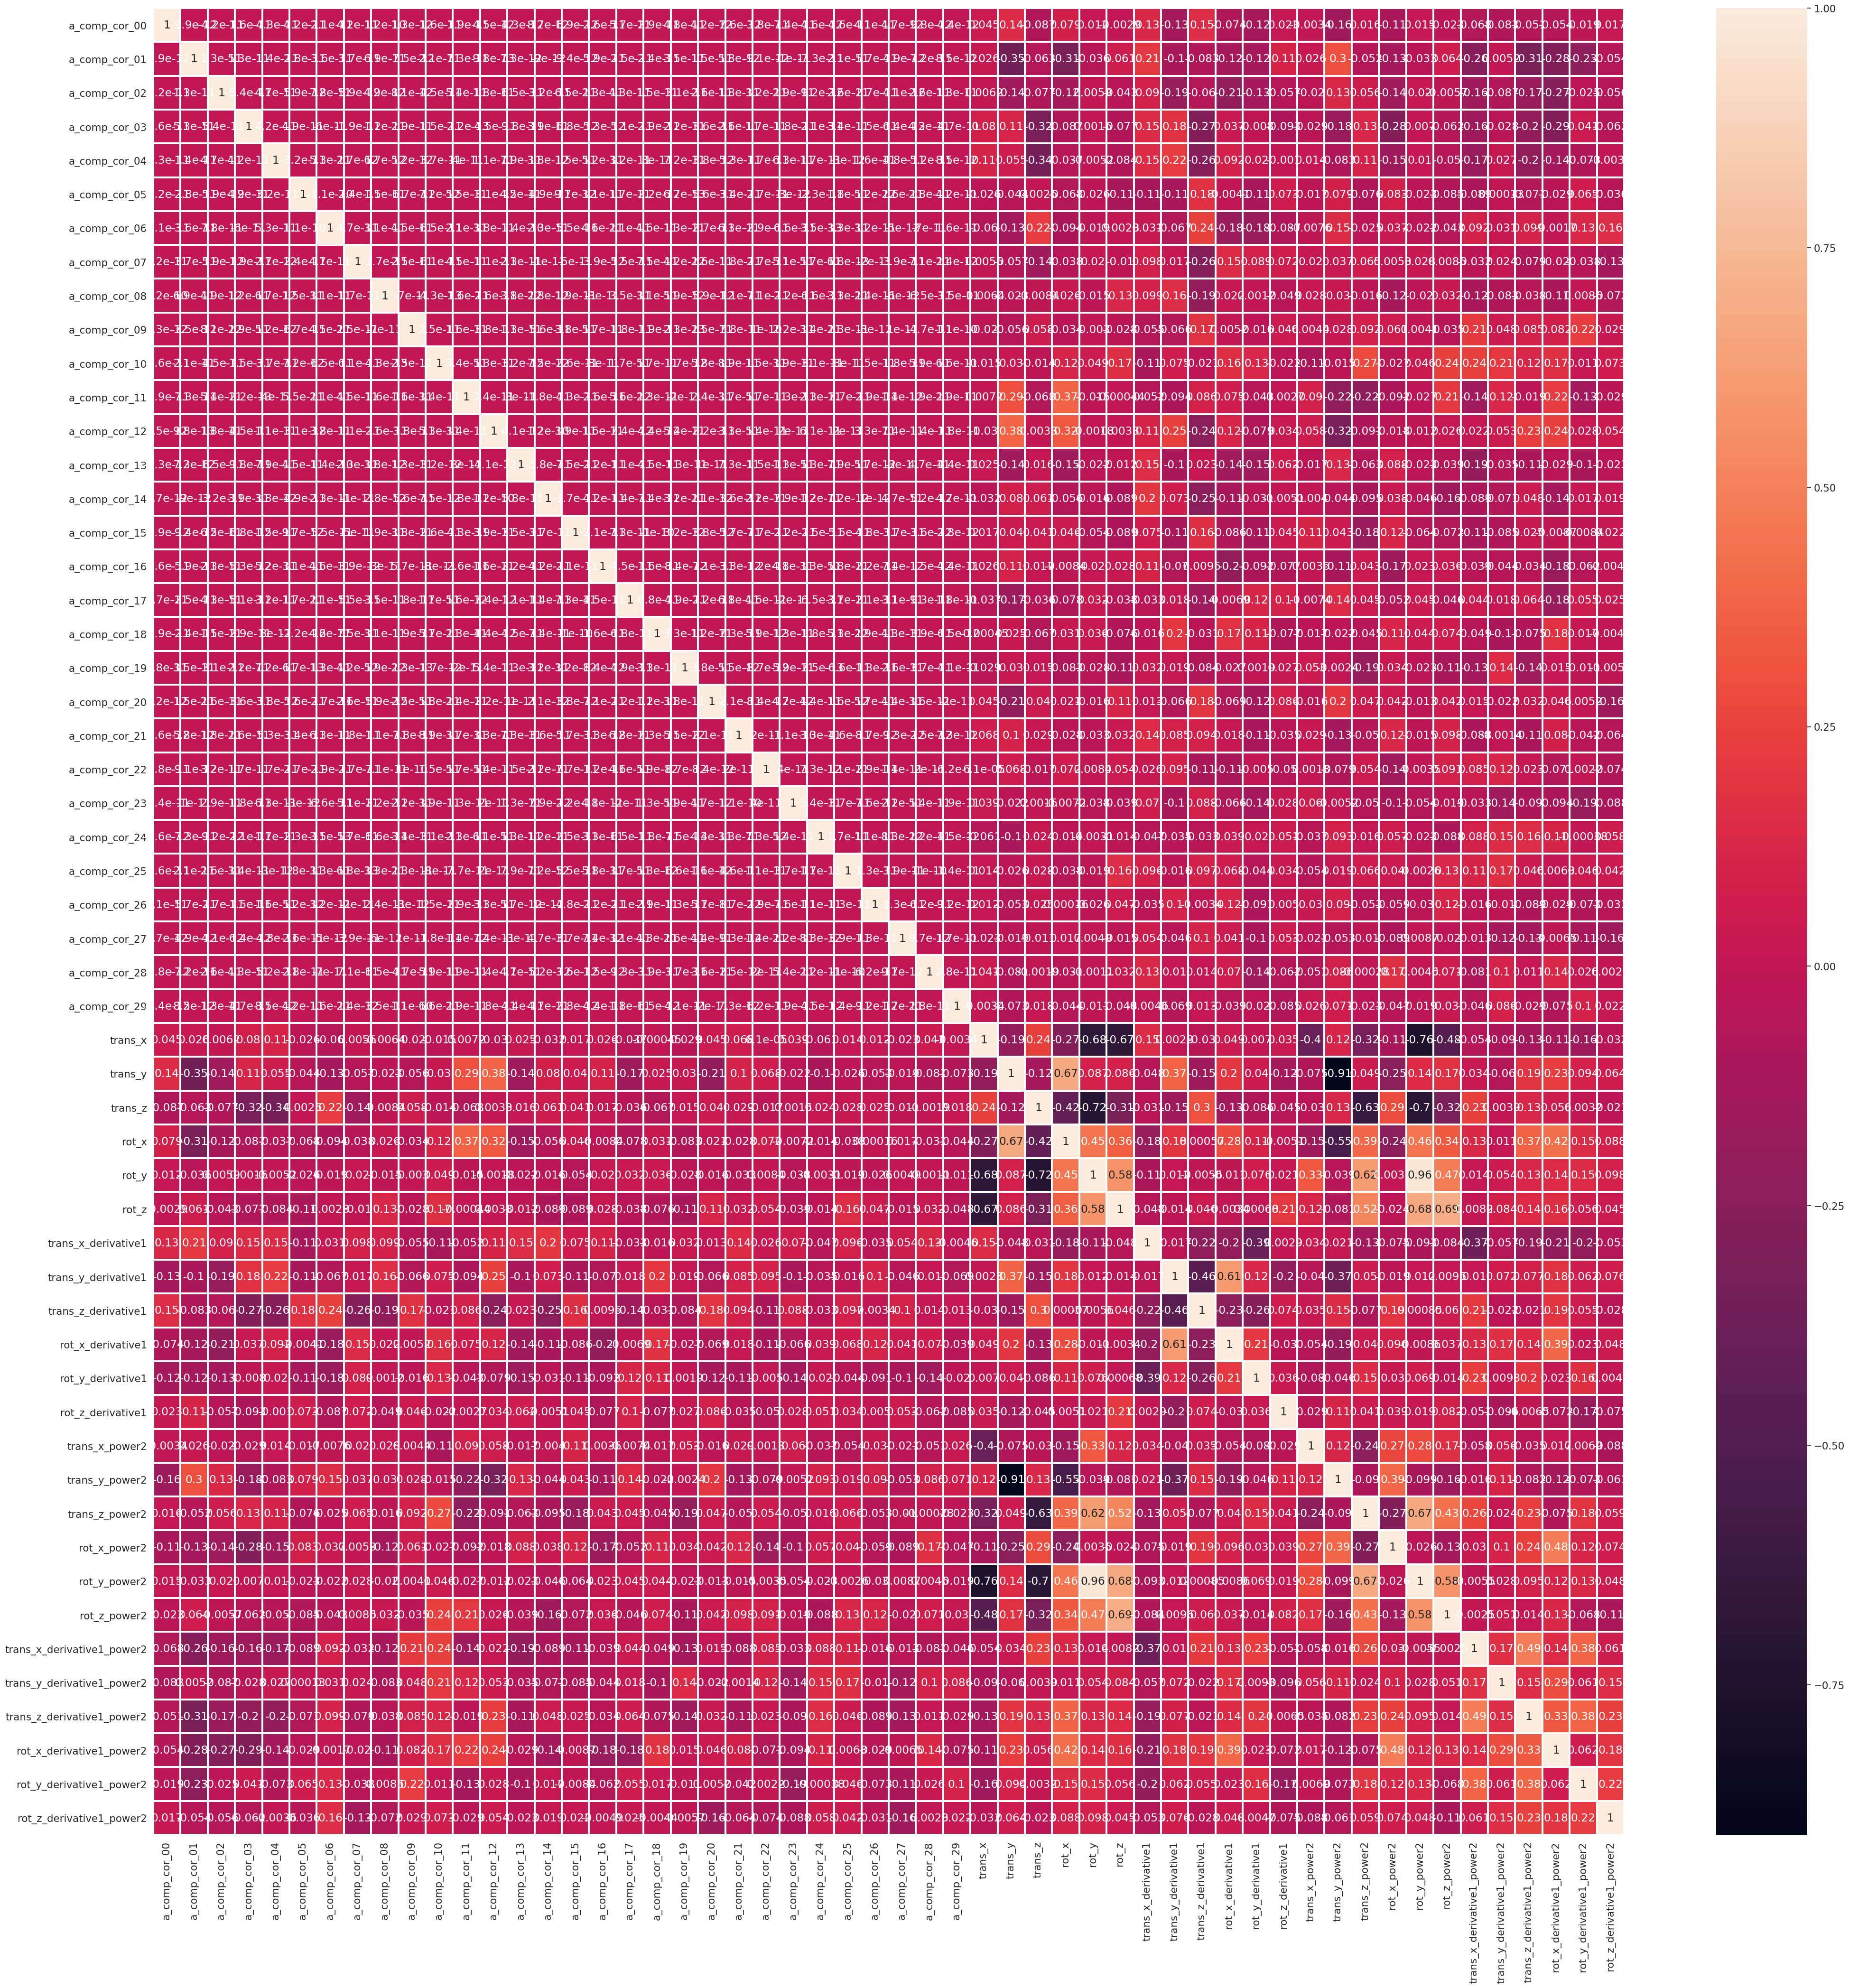

In [22]:
fig, ax = plt.subplots(figsize=(50,50)) 
sns.set(font_scale=1.4)
sns.heatmap(regressors_df.corr(), annot=True, ax=ax, linewidths=1.5)

In [33]:
events_df['RT'] = events_df['RT'].apply(lambda rt: int(0) if rt =='.' else int(rt))
events_df['demean_rt'] = events_df['RT'] -  events_df['RT'].mean()          
events_df['demean_corr'] = events_df['IsCorrect'].apply(lambda correct: 1 if correct =='Yes' else 0)
events_df['demean_corr'] = events_df['demean_corr'] - events_df['demean_corr'].mean()
events_corr = pd.DataFrame(data={
                                'onset': events_df['onset'],
                                'duration': events_df['duration'],
                                'rt': events_df['demean_rt'],
                                'correct': events_df['demean_corr']
                                })

<AxesSubplot: >

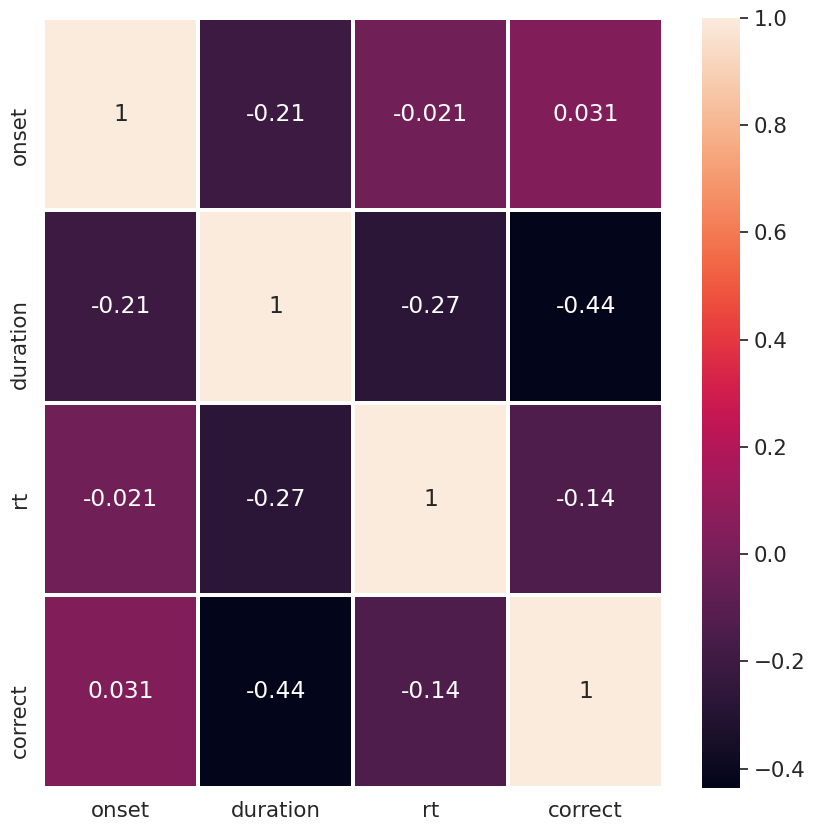

In [34]:
fig1, ax1 = plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.4)
sns.heatmap(events_corr.corr(), annot=True, ax=ax1, linewidths=1.5)